# Sage Shaw

### ME 571 - Spring 2018

# HW 2 - Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
%%bash
mpicc demo_util.c p3b.c -o p3b -lm
mpirun -n 4 ./p3b -p 15 > results.csv
head results.csv

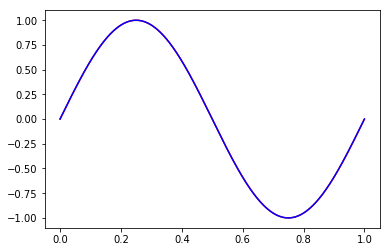

In [89]:
A = np.genfromtxt('results.csv', delimiter=',')
x = A[:,0]
u = A[:,1]
r = A[:,2]
plt.plot(x,u,'r-')
plt.plot(x,np.sin(2*np.pi*x),'b-')

3.9218283497902775e-07


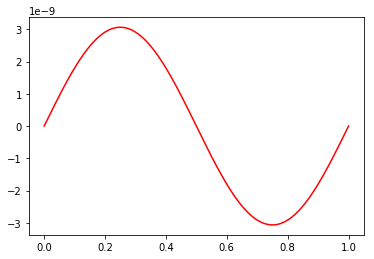

In [90]:
print(np.linalg.norm(r))
plt.plot(x,r,'r-')